<h1><center>Edinburgh Airbnb Price Prediction - Part 1: Feature Engineering and EDA</center></h1>

## Introduction

The goal of this case study is to develop a robust machine learning model that can accurately predict the average nightly price of Airbnb listings in the beautiful and historic city of Edinburgh, Scotland. This insight can help prospective Airbnb hosts set competitive and fair prices, while also giving guests a realistic idea of what to expect in different areas of the city before booking. In addition, this analysis may serve as a valuable reference for local councils to help balance the short-term rental market with long-term housing needs in the private rented sector.

Part 1 of this study focuses on feature engineering. Relevant features are carefully cleaned and transformed to ensure they are ready for training effective machine learning models. Although exploratory data analysis (EDA) and visualization are applied, they are not the main focus here; instead, EDA is used primarily to understand data distributions, detect outliers, and support the imputation of missing values.

Part 2 shifts to building the predictive models (see Part 2). Two algorithms—Deep Learning Neural Networks and XGBoost—are implemented and compared to achieve the most accurate predictions, measured by the lowest root mean squared error (RMSE).

### Import libaries

In [1]:
import sys
sys.executable


'd:\\Edinburgh_Price_lists\\edin_env\\python.exe'

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold,cross_validate
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

import joblib
import warnings

warnings.filterwarnings("ignore")


### Load the data

In [4]:
import os
os.chdir("..")
os.getcwd()

'd:\\Edinburgh_Airbnb_Price_Prediction'

In [49]:

# Load property data
properties_df = pd.read_csv('notebook/data/origianl_data_listings.csv', low_memory=False)

# Load availability data
availability_df = pd.read_csv('notebook/data/original_data_calendar.csv')

<a id="setup"></a>
# <p style="background-color: #1900ffff; font-family:calibri; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:10px 30px;">Creat the target variable `price`</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [50]:
availability_df.rename(columns={'listing_id':'id','price':'price_target'},inplace=True)
availability_df=availability_df[['id','price_target']]
availability_df.columns

Index(['id', 'price_target'], dtype='object')

In [51]:
properties_df.set_index('id',inplace=True)
availability_df.set_index('id',inplace=True)


In [52]:
availability_df.price_target=availability_df.price_target.apply(lambda x:float(str(x).replace("$",'').replace(',','')))
availability_df=availability_df.groupby('id').aggregate({'price_target':'mean'})

In [ ]:
numeric_cols = ['bathrooms', 'bedrooms', 'beds', 'accommodates', 'guests_included','host_response_rate',
                'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'security_deposit','review_scores_rating','number_of_reviews',
                'cleaning_fee', 'extra_people','reviews_per_month','price_target']
categorical_columns = [
    'room_type', 'property_type', 'neighbourhood_cleansed', 'host_response_time',
    'host_is_superhost', 'bed_type', 'instant_bookable', 'cancellation_policy'
]

In [93]:
my_data.neighbourhood_cleansed.unique()

array(['Old Town, Princes Street and Leith Street',
       'Meadows and Southside', 'Joppa', 'South Leith',
       'Canongate, Southside and Dumbiedykes', 'New Town West',
       'Tollcross', 'Hillside and Calton Hill', 'Deans Village',
       'New Town East and Gayfield', 'North Leith and Newhaven',
       'Leith (Albert Street)', "Siverknowes and Davidson's Mains",
       'Dalry and Fountainbridge', 'Merchiston and Greenhill',
       'Meadowbank and Abbeyhill North',
       'Leith (Hermitage and Prospect Bank)',
       'Jewel, Brunstane and Newcraighall',
       'The Shore and Constitution Street',
       'Easter Road and Hawkhill Avenue', 'Murrayfield and Ravelston',
       'Marchmont East and Sciennes', 'Drylaw', 'Broughton South',
       'Trinity East and The Dudleys', 'Newington and Dalkeith Road',
       'Marchmont West', 'Broughton North and Powderhall', 'Oxgangs',
       'Portobello', 'Bonnington', 'Bruntsfield', 'Pilrig',
       'Comiston and Swanston', 'Willowbrae and Duddin

In [53]:
my_data=properties_df.join(availability_df,on='id',how='inner')

In [39]:
my_data[numeric_cols+categorical_columns].to_csv('notebook/data/data_main.csv')

In [40]:
pd.read_csv('notebook/data/data_main.csv').price_target

0         101.054795
1         111.816438
2          49.983562
3          33.827397
4          80.241096
            ...     
13240      98.183562
13241    1000.000000
13242    1000.000000
13243      47.000000
13244      36.076712
Name: price_target, Length: 13245, dtype: float64

In [44]:
columns_dollar=['security_deposit', 'cleaning_fee', 'extra_people']
columns_percent=['host_response_rate']

In [47]:
my_data

NameError: name 'my_data' is not defined

In [18]:
from src.exception import CustomException
from src.logger import logging
import os
    
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

In [15]:
availability_df

,price_target
id,
15420,101.054795
24288,111.816438
38628,49.983562
44552,33.827397
47616,80.241096
...,...
36061175,98.183562
36061191,1000.000000
36061722,1000.000000


In [45]:
# Convert `price` to numeric
availability_df.price_target=availability_df.price_target.apply(lambda x:float(str(x).replace("$",'').replace(',','')))
# Calculate the average price of each properties
# availability_df=availability_df.rename(columns = {'listing_id': 'id'})
mean_price = availability_df.groupby('id').agg({'price_target': 'mean'})
# Set as targets
targets = mean_price
targets

,price_target
id,
15420,101.054795
24288,111.816438
38628,49.983562
44552,33.827397
47616,80.241096
...,...
36061175,98.183562
36061191,1000.000000
36061722,1000.000000


In [46]:
my_data=

NameError: name 'my_data' is not defined

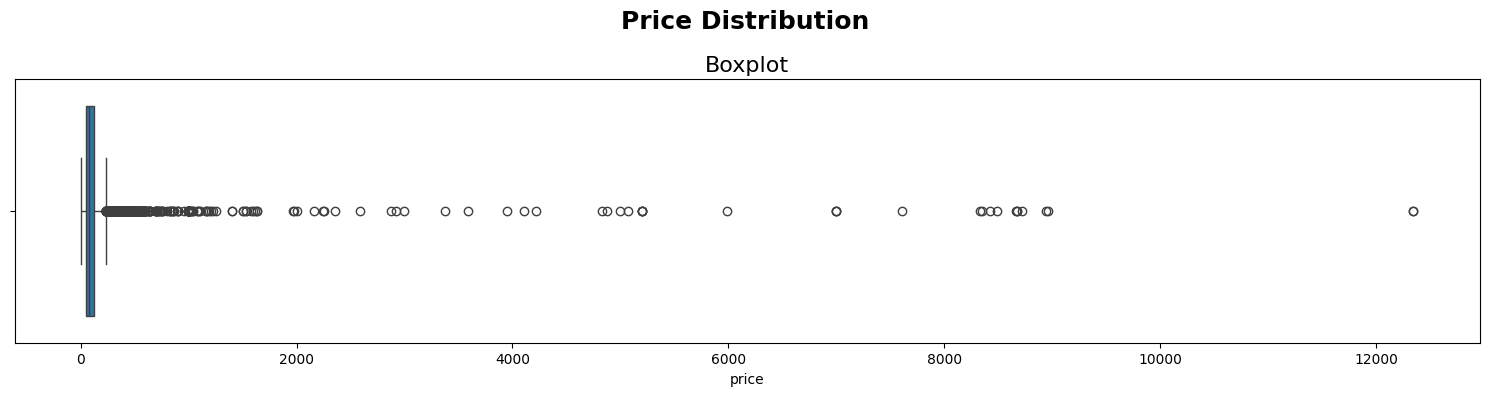

In [23]:
# Visualized the target
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axes
fig, ax = plt.subplots(figsize=(15, 4))

# Plot boxplot
sns.boxplot(data=targets, x='price', ax=ax)

# Add titles
ax.set_title('Boxplot', fontsize=16)
# axes[1].set_title('Boxplot', fontsize=16)

# Add a main title
fig.suptitle('Price Distribution', fontsize=18, fontweight='bold')

# Adjust spacing and show
plt.tight_layout()
plt.show()


<a id="setup"></a>
# <p style="background-color: #1900ffff; font-family:calibri; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:10px 30px;">Remove top 5% in 'price'</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [22]:
# Define the cut-off for the top 5% of prices
upper_limit = targets['price_target'].quantile(0.95)

# Identify rows with outlier prices
outlier_rows = targets.query('price_target >= @upper_limit').index
print(outlier_rows[0])
# Filter out listings above the cut-off
filtered_targets = targets.query('price_target < @upper_limit')

# Show results
print(f'properties priced above £{upper_limit:.1f} per night have been removed from the dataset.')
print(f'{targets.shape[0] - filtered_targets.shape[0]} listings were excluded.')


112625
properties priced above £261.6 per night have been removed from the dataset.
663 listings were excluded.


In [36]:
targets.shape[0]-663 

12582

In [35]:
targets[targets.price_target<upper_limit].shape

(12582, 1)

<a id="setup"></a>
# <p style="background-color: #1900ffff; font-family:calibri; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:10px 30px;">Feature Selection from the original dataset</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [25]:
# Get column counts in a different way
total_cols = len(properties_df.columns)
numeric_cols = properties_df.select_dtypes(include='number').columns.size
categorical_cols = properties_df.select_dtypes(include='object').columns.size
datetime_cols = properties_df.select_dtypes(include='datetime64').columns.size

# Display results
print(f'Total columns: {total_cols}')
print(f'Numeric columns: {numeric_cols}')
print(f'Categorical columns: {categorical_cols}')
print(f'Datetime columns: {datetime_cols}')


Total columns: 106
Numeric columns: 45
Categorical columns: 61
Datetime columns: 0


<a id="setup"></a>
# <p style="background-color: #1900ffff; font-family:calibri; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:10px 30px;">Step 1 | Numerical Features</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [27]:
# Use 'id' column as the DataFrame index
properties_df.set_index('id', inplace=True)

In [28]:
properties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13245 entries, 15420 to 36066014
Columns: 105 entries, listing_url to reviews_per_month
dtypes: float64(24), int64(20), object(61)
memory usage: 10.7+ MB


In [59]:
my_data.host_response_rate

id
15420       100%
24288       100%
38628       100%
44552       100%
47616       100%
            ... 
36061175     NaN
36061191    100%
36061722    100%
36061940     81%
36066014    100%
Name: host_response_rate, Length: 13245, dtype: object

In [60]:
# Select numerical feature columns for analysis
numeric_cols = ['bathrooms', 'bedrooms', 'beds', 'accommodates', 'guests_included','host_response_rate',
                'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'security_deposit','review_scores_rating','number_of_reviews',
                'cleaning_fee', 'extra_people','reviews_per_month']

# Extract the numeric data subset
numeric_data = my_data.loc[:, numeric_cols]

# Sort the data by the index (property id)
numeric_data_sorted = numeric_data.sort_index()

# Display the first few rows
numeric_data_sorted.head()

,bathrooms,bedrooms,beds,accommodates,guests_included,host_response_rate,minimum_nights_avg_ntm,maximum_nights_avg_ntm,security_deposit,review_scores_rating,number_of_reviews,cleaning_fee,extra_people,reviews_per_month
id,,,,,,,,,,,,,,
15420,1.0,1.0,1.0,2,1,100%,2.9,30.0,$200.00,99.0,283,$40.00,$0.00,2.76
24288,1.5,2.0,2.0,4,4,100%,2.0,365.0,$250.00,92.0,199,$30.00,$25.00,1.86
38628,1.0,0.0,2.0,2,2,100%,4.2,60.0,$100.00,94.0,52,NaN,$10.00,0.85
44552,1.0,1.0,1.0,2,2,100%,2.0,21.0,$0.00,93.0,184,$10.00,$0.00,1.71
47616,1.0,1.0,1.0,2,2,100%,1.0,31.0,$75.00,98.0,32,$10.00,$0.00,0.84


<a id="setup"></a>
# <p style="background-color: #1900ffff; font-family:calibri; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:10px 30px;">Selecting Categorical Features</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [110]:
data_num.select_dtypes('object').head(1)

,room_type,property_type,neighbourhood_cleansed,host_response_time,host_is_superhost,bed_type,instant_bookable,cancellation_policy
id,,,,,,,,
15420,Entire home/apt,Apartment,"Old Town, Princes Street and Leith Street",within a few hours,t,Real Bed,f,strict_14_with_grace_period


In [61]:
onhot=['room_type','host_response_time','bed_type','instant_bookable','cancellation_policy']
target_encod_columns=['property_type','neighbourhood_cleansed']

In [67]:
my_data.extra_people

id
15420        $0.00
24288       $25.00
38628       $10.00
44552        $0.00
47616        $0.00
             ...  
36061175    $20.00
36061191     $0.00
36061722     $0.00
36061940     $0.00
36066014    $15.00
Name: extra_people, Length: 13245, dtype: object

In [119]:
class TargetGuidedEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.encoding_dict = {}
        
    def fit(self, X, y):
        X = X.copy()
        y = pd.Series(y)
        for col in self.columns:
            # Calculate the mean target value for each category
            self.encoding_dict[col] = X.groupby(col)[y.name].mean().to_dict()
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            if col in X.columns:
                X[col] = X[col].map(self.encoding_dict[col])
        return X

In [121]:
a=TargetGuidedEncoder()

In [137]:
a.fit(my_data,my_data.price_target)

TypeError: 'NoneType' object is not iterable

In [1]:
my_data

NameError: name 'my_data' is not defined

In [30]:
properties_df.select_dtypes(include='object').columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'picture_url',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'has_availability', 'calendar_last_scraped', 'first_review',
       'last_review', 'requires_license', 'license', '

In [31]:
# Define the list of categorical feature columns to extract
categorical_columns = [
    'room_type', 'property_type', 'neighbourhood_cleansed', 'host_response_time',
    'host_is_superhost', 'bed_type', 'instant_bookable', 'cancellation_policy'
]

# Extract categorical columns from the dataset
categorical_data = properties_df[categorical_columns]

# Ensure the data is sorted by the DataFrame's index for consistency
categorical_data_sorted = categorical_data.sort_index()

# Optionally, merge the target variable 'price' for quick reference
# categorical_data_sorted = categorical_data_sorted.join(targets, how='inner')

# Display the first few records of the prepared categorical data
categorical_data_sorted.head()


,room_type,property_type,neighbourhood_cleansed,host_response_time,host_is_superhost,bed_type,instant_bookable,cancellation_policy
id,,,,,,,,
15420,Entire home/apt,Apartment,"Old Town, Princes Street and Leith Street",within a few hours,t,Real Bed,f,strict_14_with_grace_period
24288,Entire home/apt,Loft,Meadows and Southside,within an hour,t,Real Bed,t,flexible
38628,Entire home/apt,Apartment,Joppa,within an hour,f,Real Bed,t,strict_14_with_grace_period
44552,Private room,Condominium,South Leith,within a few hours,t,Real Bed,f,strict_14_with_grace_period
47616,Private room,Condominium,"Canongate, Southside and Dumbiedykes",within an hour,f,Real Bed,f,moderate


In [32]:
# Drop rows removed in targets
numeric_data_sorted = numeric_data_sorted.drop(outlier_rows, axis = 0)
numeric_data_sorted.shape

(12582, 14)

In [33]:
# Drop rows removed in targets
categorical_data_sorted = categorical_data_sorted.drop(outlier_rows, axis = 0)
categorical_data_sorted.shape

(12582, 8)

In [35]:
filtered_targets["price_cat"] = pd.cut(filtered_targets["price"],
                               bins=[0., 50, 100, 150, 200., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [36]:
numeric_data_sorted["price_cat"] = pd.cut(filtered_targets["price"],
                               bins=[0., 50, 100, 150, 200., np.inf],
                               labels=[1, 2, 3, 4, 5])

categorical_data_sorted["price_cat"] = pd.cut(filtered_targets["price"],
                               bins=[0., 50, 100, 150, 200., np.inf],
                               labels=[1, 2, 3, 4, 5])

<Axes: >

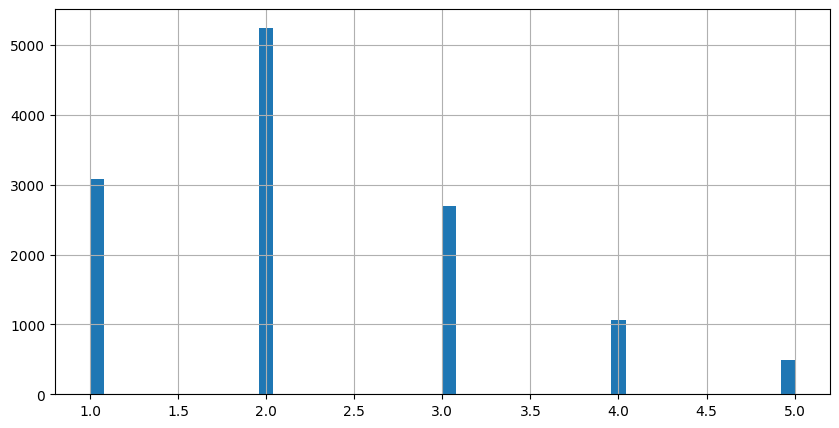

In [37]:
categorical_data_sorted.price_cat.hist(bins=50, figsize=(10,5))

<a id="setup"></a>
# <p style="background-color: #1900ffff; font-family:calibri; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:10px 30px;">Train and test split</p>

<a id="setup"></a>
<p style="background-color: #5900ffff; font-family:calibri; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px 37px;  padding:20px"> As you can see, the train and test set generated using stratified sampling has
price category proportions almost identical to those in the full dataset</p>

In [38]:
num_train, num_test, cat_train, cat_test, y_train, y_test=train_test_split(numeric_data_sorted,categorical_data_sorted,\
                        filtered_targets,test_size = 0.20, shuffle = True, random_state = 42)#,stratify=numeric_data_sorted['price_cat']
print(f'Total columns: {total_cols}')
print(f'price category proportions for num_train set:{num_train["price_cat"].value_counts() / len(num_train)}')
print(f'price category proportions for num_test set:{num_test["price_cat"].value_counts() / len(num_test)}')
print(f'price category proportions for cat_train set:{cat_train["price_cat"].value_counts() / len(cat_train)}')
print(f'price category proportions for cat_test set:{cat_test["price_cat"].value_counts() / len(cat_test)}')
print(f'price category proportions for full dataset:{numeric_data_sorted["price_cat"].value_counts() / len(numeric_data_sorted)}')

Total columns: 106
price category proportions for num_train set:price_cat
2    0.414009
1    0.245107
3    0.215698
4    0.084153
5    0.041033
Name: count, dtype: float64
price category proportions for num_test set:price_cat
2    0.431069
1    0.242749
3    0.207390
4    0.086214
5    0.032578
Name: count, dtype: float64
price category proportions for cat_train set:price_cat
2    0.414009
1    0.245107
3    0.215698
4    0.084153
5    0.041033
Name: count, dtype: float64
price category proportions for cat_test set:price_cat
2    0.431069
1    0.242749
3    0.207390
4    0.086214
5    0.032578
Name: count, dtype: float64
price category proportions for full dataset:price_cat
2    0.417422
1    0.244635
3    0.214036
4    0.084565
5    0.039342
Name: count, dtype: float64


In [39]:
num_train.drop('price_cat',axis=1,inplace=True)

In [40]:
num_test.drop('price_cat',axis=1,inplace=True)

In [41]:
cat_train.drop('price_cat',axis=1,inplace=True)

In [42]:
cat_test.drop('price_cat',axis=1,inplace=True)

In [43]:
y_train.drop('price_cat',axis=1,inplace=True)

In [44]:
y_test.drop('price_cat',axis=1,inplace=True)

In [45]:
print(num_train.shape,cat_train.shape,y_train.shape)

(10065, 14) (10065, 8) (10065, 1)


In [46]:
print(num_test.shape,cat_test.shape,y_test.shape)

(2517, 14) (2517, 8) (2517, 1)


<a id="setup"></a>
# <p style="background-color: #1900ffff; font-family:calibri; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:10px 30px;">Proprocessing - Numerical Features</p>

In [47]:
# Check data types of the selected columns
num_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10065 entries, 33077765 to 22670370
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bathrooms               10057 non-null  float64
 1   bedrooms                10062 non-null  float64
 2   beds                    10054 non-null  float64
 3   accommodates            10065 non-null  int64  
 4   guests_included         10065 non-null  int64  
 5   host_response_rate      7446 non-null   object 
 6   minimum_nights_avg_ntm  10065 non-null  float64
 7   maximum_nights_avg_ntm  10065 non-null  float64
 8   security_deposit        6467 non-null   object 
 9   review_scores_rating    8468 non-null   float64
 10  number_of_reviews       10065 non-null  int64  
 11  cleaning_fee            7248 non-null   object 
 12  extra_people            10065 non-null  object 
 13  reviews_per_month       8574 non-null   float64
dtypes: float64(7), int64(3), object(4

<a id="setup"></a>
<p style="background-color: #5900ffff; font-family:calibri; color:white; font-size:80%; font-family:Verdana; text-align; border-radius:30px 35px;  padding:20px">Covert `security_deposit`, `cleaning_fee` and `extra_people` to numeric</p>

In [48]:
num_train[['security_deposit', 'cleaning_fee', 'extra_people','host_response_rate']].head(3)

,security_deposit,cleaning_fee,extra_people,host_response_rate
id,,,,
33077765,NaN,NaN,$0.00,67%
21042261,NaN,NaN,$0.00,NaN
32182453,NaN,$74.00,$0.00,93%


In [71]:
from src.exception import CustomException
from src.logger import logging
import sys

In [49]:
num_train['security_deposit']=num_train['security_deposit'].\
apply(lambda x:float(str(x).replace('$','').replace(',','')))/100
num_test['security_deposit']=num_test['security_deposit'].\
apply(lambda x:float(str(x).replace('$','').replace(',','')))/100

In [50]:
num_train['cleaning_fee']=num_train['cleaning_fee'].\
apply(lambda x:float(str(x).replace('$','').replace(',','')))/100
num_test['cleaning_fee']=num_test['cleaning_fee'].\
apply(lambda x:float(str(x).replace('$','').replace(',','')))/100

In [51]:
num_train['extra_people']=num_train['extra_people'].\
apply(lambda x:float(str(x).replace('$','').replace(',','')))
num_test['extra_people']=num_test['extra_people'].\
apply(lambda x:float(str(x).replace('$','').replace(',','')))

In [52]:
num_train['host_response_rate']=num_train['host_response_rate'].\
apply(lambda x:float(str(x).replace('%','').replace(',','')))/100
num_test['host_response_rate']=num_test['host_response_rate'].\
apply(lambda x:float(str(x).replace('%','').replace(',','')))/100

In [53]:
num_train['maximum_nights_avg_ntm']=num_train['maximum_nights_avg_ntm']/100
num_test['maximum_nights_avg_ntm']=num_test['maximum_nights_avg_ntm']/100

In [54]:
num_train['minimum_nights_avg_ntm']=num_train['minimum_nights_avg_ntm']/100
num_test['minimum_nights_avg_ntm']=num_test['minimum_nights_avg_ntm']/100

In [55]:
num_train['review_scores_rating']=num_train['review_scores_rating']/100
num_test['review_scores_rating']=num_test['review_scores_rating']/100

In [56]:
num_train['number_of_reviews']=num_train['number_of_reviews']/100
num_test['number_of_reviews']=num_test['number_of_reviews']/100

In [57]:
num_test.head(3)

,bathrooms,bedrooms,beds,accommodates,guests_included,host_response_rate,minimum_nights_avg_ntm,maximum_nights_avg_ntm,security_deposit,review_scores_rating,number_of_reviews,cleaning_fee,extra_people,reviews_per_month
id,,,,,,,,,,,,,,
15227684,1.0,2.0,3.0,6,1,NaN,0.03,0.28,NaN,0.88,0.18,0.5,0.0,0.56
21600908,1.0,2.0,3.0,5,1,1.0,0.02,0.05,1.0,1.00,0.02,0.2,0.0,0.11
20222564,1.0,2.0,3.0,5,1,1.0,0.03,11.25,0.0,0.91,0.28,0.4,0.0,1.23


<a id="setup"></a>
<p style="background-color: #5900ffff; font-family:calibri; color:white; font-size:80%; font-family:Verdana; text-align; border-radius:30px 35px;  padding:20px">Handling Missing Data</p>

In [58]:
# Check for missing data
nan_count=num_train.isna().sum()*100/num_train.shape[0]
nan_count

bathrooms                  0.079483
bedrooms                   0.029806
beds                       0.109290
accommodates               0.000000
guests_included            0.000000
host_response_rate        26.020864
minimum_nights_avg_ntm     0.000000
maximum_nights_avg_ntm     0.000000
security_deposit          35.747640
review_scores_rating      15.866865
number_of_reviews          0.000000
cleaning_fee              27.988077
extra_people               0.000000
reviews_per_month         14.813711
dtype: float64

<a id="setup"></a>

<div style="background-color:#5900ff; font-family:Verdana; color:white; 
            border-radius:30px 35px; padding:20px; width:80%; margin:auto;">

  <!-- First line: centered and bigger -->
  <p style="font-size:120%; text-align:center; margin:5px 0;">
    Missing Values in Bathrooms, Bedrooms, Beds and reviews_per_month
  </p>

  <!-- Second line: left aligned and smaller -->
  <p style="font-size:90%; text-align:left; margin:5px 0;">
    Only a small number of records have missing values in these fields, 
    so we will simply exclude those rows from the dataset.
  </p>

</div>


In [60]:
low_missing_columns=nan_count[(nan_count.values<1)&(nan_count.values>.0001)]

In [61]:
num_train1=num_train.dropna(subset=low_missing_columns.index)
num_train.shape[0]-num_train1.shape[0]

20

In [62]:
num_test1=num_test.dropna(subset=low_missing_columns.index)
num_test.shape[0]-num_test1.shape[0]

6

For host_response_rate: remove rows with missing 'host_is_superhost',
then fill missing 'host_response_rate' values with the mean response rate within each 'host_is_superhost' group. For this we need to join numeric and categorical data on 'id'


In [63]:
tot=num_train1.join(cat_train,on='id',how='inner')
tot=tot.dropna(subset='host_is_superhost')
num_train1['host_response_rate'] = tot.groupby('host_is_superhost')['host_response_rate'].transform(
    lambda x: x.fillna(x.mean())
)

In [64]:
tot_test=num_test1.join(cat_test,on='id',how='inner')
tot_test=tot_test.dropna(subset='host_is_superhost')
num_test1['host_response_rate'] = tot_test.groupby('host_is_superhost')['host_response_rate'].transform(
    lambda x: x.fillna(x.mean())
)

In [49]:
 #fill the missing values in the reviews_per_month column using the mean

In [65]:
num_train1['reviews_per_month'] = num_train1['reviews_per_month'].fillna(num_train1['reviews_per_month'].mean())
num_test1['reviews_per_month'] = num_test1['reviews_per_month'].fillna(num_test1['reviews_per_month'].mean())

<a id="setup"></a>

<div style="background-color:#5900ff; font-family:Verdana; color:white; 
            border-radius:30px 35px; padding:20px; width:80%; margin:auto;">

  <!-- First line: centered and bigger -->
  <p style="font-size:120%; text-align:center; margin:5px 0;">
    Missing Values in Host Response Rate, Security Deposit, and Cleaning Fee — Imputation
  </p>

  <!-- Second line: left aligned and smaller -->
  <p style="font-size:90%; text-align:left; margin:5px 0;">
 KNN imputation will used will be used to handle missing data in these columns.
  </p>

</div>


### KNN imputation

In [66]:
# KNN Imputation
imputer = KNNImputer(n_neighbors = 5)
num_train_imputed_KNN = imputer.fit_transform(num_train1)
# num_features_train_imputed_KNN
num_train_imputed = pd.DataFrame(data = num_train_imputed_KNN, columns = num_train1.columns, index = num_train1.index)

In [67]:
# KNN Imputation
imputer = KNNImputer(n_neighbors = 5)
num_test_imputed_KNN = imputer.fit_transform(num_test1)
# num_features_train_imputed_KNN
num_test_imputed = pd.DataFrame(data = num_test_imputed_KNN, columns = num_test1.columns, index = num_test1.index)


<a id="setup"></a>
# <p style="background-color: #5900ffff; font-family:calibri; color:white; font-size:80%; font-family:Verdana; text-align;center; border-radius:30px 35px;  padding:20px">Handling Outliers</p>
The target variable `price` is not normaly distributed, but heavily skewed with extremely large outliers. Samples with the largest 3% in `price` will be dropped, as they may be extrmely luxuary that cannot be counted as a typical Airbnb property. 

I will also look into individual features and maily logic will be used to identily outliers. For instance, this case study focuses on typical Airbnb listings that are usually for short-term stays, therefore those requires individual stays to be longer than 30 nights will be removed, becuase their pricing strategy and other charges for other services (cleaning fee, security deposit, etc) mostly likely follow a different logical from the typical Airbnb listings.

Inter Quantile Range (IQR) has been tried to identify outliers. However, most features of this data set are too skewed (see plots below) and a large proportion of samples would be marked as outliers by IQR. Hence, IQR is not used, as a model with toletance to data variability is desired.  



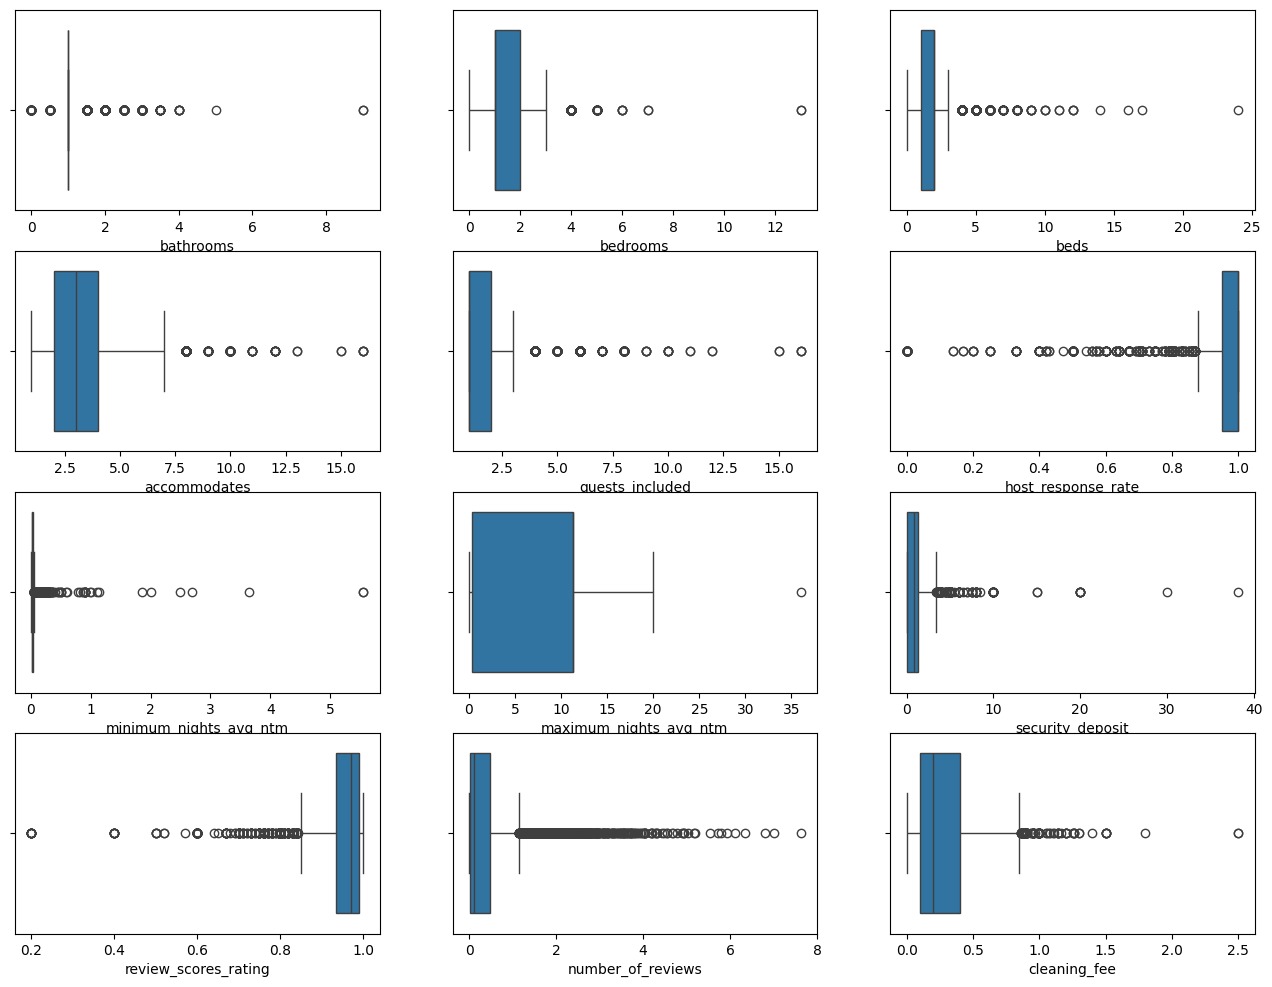

In [68]:
cols = num_train_imputed.iloc[:, :-2].columns.values

fig, axs = plt.subplots(4,3, figsize=(16, 12))
axs = axs.flatten()
# axs
for i, k in enumerate(cols):
    sns.boxplot(data=num_train_imputed, x=k, ax=axs[i])

<a id="setup"></a>
# <p style="background-color: #5900ffff; font-family:calibri; color:white; font-size:80%; font-family:Verdana; text-align;center; border-radius:30px 35px;  padding:20px">Detecting and Managing Outliers</p>
Both the target variable (price) and several features contain extreme outliers. Outliers will be assessed for each feature individually, using typical Airbnb listings as a benchmark. This project does not aim to predict prices for properties that deviate significantly from a standard Airbnb listing.

The following thresholds will be applied:

beds ≤ 6

minimum_nights_avg_ntm ≤ 10

security_deposit ≤ 500

cleaning_fee ≤ 200

In [ ]:
df_0 = num_train_imputed
# Remove outliers considering `minimum_nights_avg_ntm`
df_1 = df_0[df_0['minimum_nights_avg_ntm'] <= 3] 
print('Rows removed:', df_0.shape[0] - df_1.shape[0])
print('Total number of rows removed: {}, {}% of the total.'.format(df_0.shape[0] - df_1.shape[0], round(100*(df_0.shape[0] - df_1.shape[0])/df_0.shape[0], 1)))


Rows removed: 3
Total number of rows removed: 3, 0.0% of the total.


In [70]:
# Remove outliers considering `beds`
df_2 = df_1[df_1['beds'] <= 6] 
print('Rows removed:', df_1.shape[0] - df_2.shape[0])


Rows removed: 65


In [71]:
# Remove outliers considering `security_deposit`
df_3 = df_2[df_2['security_deposit'] <= 1000]
print('Rows removed:', df_2.shape[0] - df_3.shape[0])


Rows removed: 0


In [72]:
# Remove outliers considering `cleaning_fee`
df_4 = df_3[df_3['cleaning_fee'] <= 200] 
print('Rows removed:', df_3.shape[0] - df_4.shape[0])
print('Total number of rows removed: {}, {}% of the total.'.format(df_0.shape[0] - df_4.shape[0], round(100*(df_0.shape[0] - df_4.shape[0])/df_0.shape[0], 1)))

Rows removed: 0
Total number of rows removed: 68, 0.7% of the total.


In [73]:
q1=df_4['maximum_nights_avg_ntm'].quantile(.25)
q3=df_4['maximum_nights_avg_ntm'].quantile(.75)
Q=q3-q1
outlier_index=df_4.loc[(df_4['maximum_nights_avg_ntm']<q1-.5*Q) | (df_4['maximum_nights_avg_ntm']>q3+.5*Q)].index
df_4.drop(outlier_index,axis=0,inplace=True)

In [74]:
# Keep a copy of cleaned numerical features
num_train_cleaned = df_4.copy()
num_train_cleaned.shape

(9975, 14)

In [75]:
# Keep a copy of cleaned numerical features
num_test_cleaned = num_test_imputed.copy()
num_test_cleaned.shape

(2511, 14)

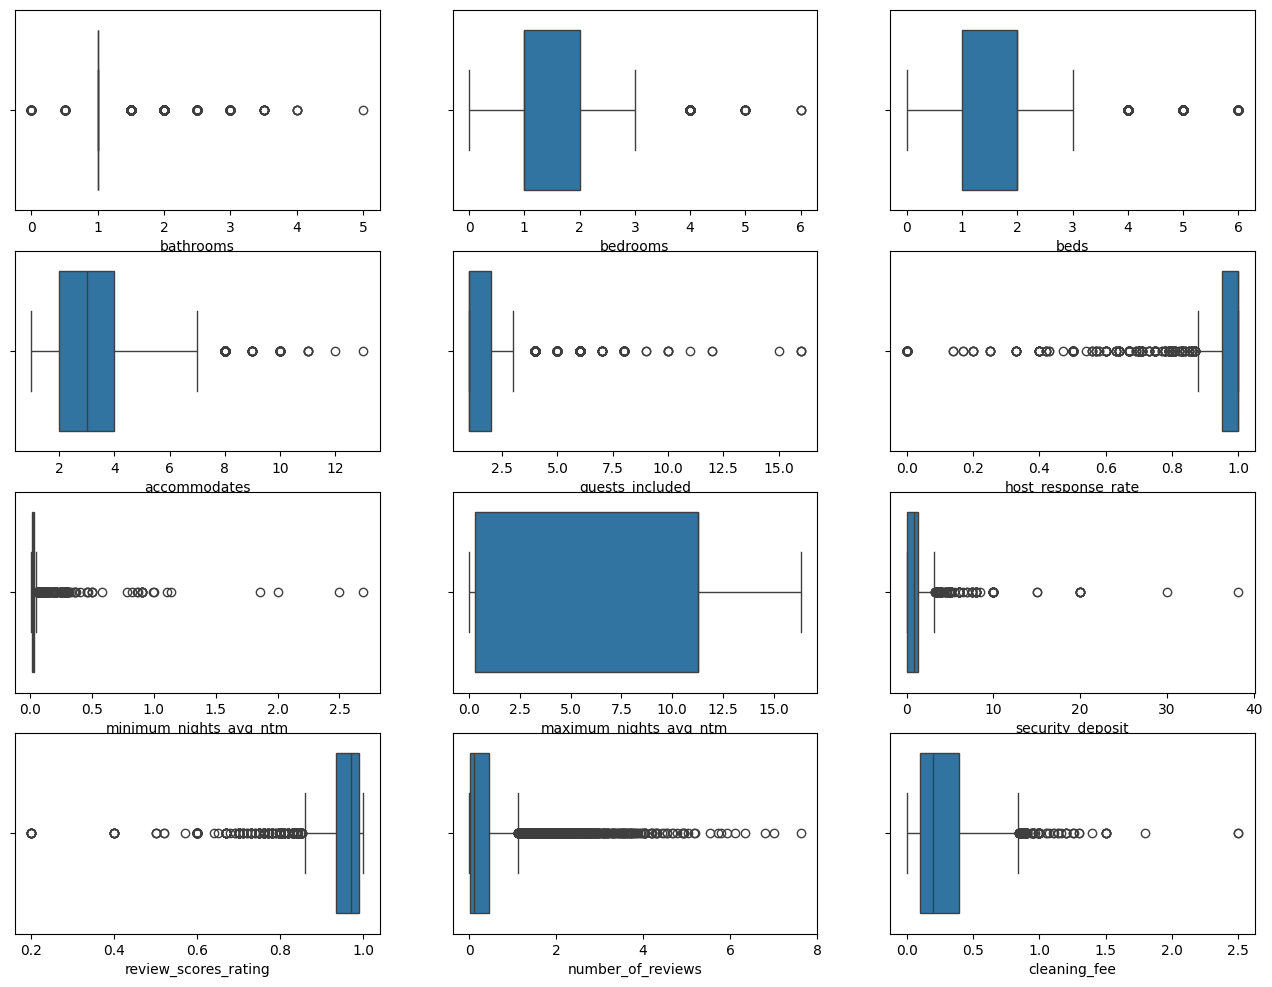

In [76]:
cols = num_train_cleaned.iloc[:, :-2].columns.values

fig, axs = plt.subplots(4,3, figsize=(16, 12))
axs = axs.flatten()
# axs
for i, k in enumerate(cols):
    sns.boxplot(data=num_train_cleaned, x=k, ax=axs[i])

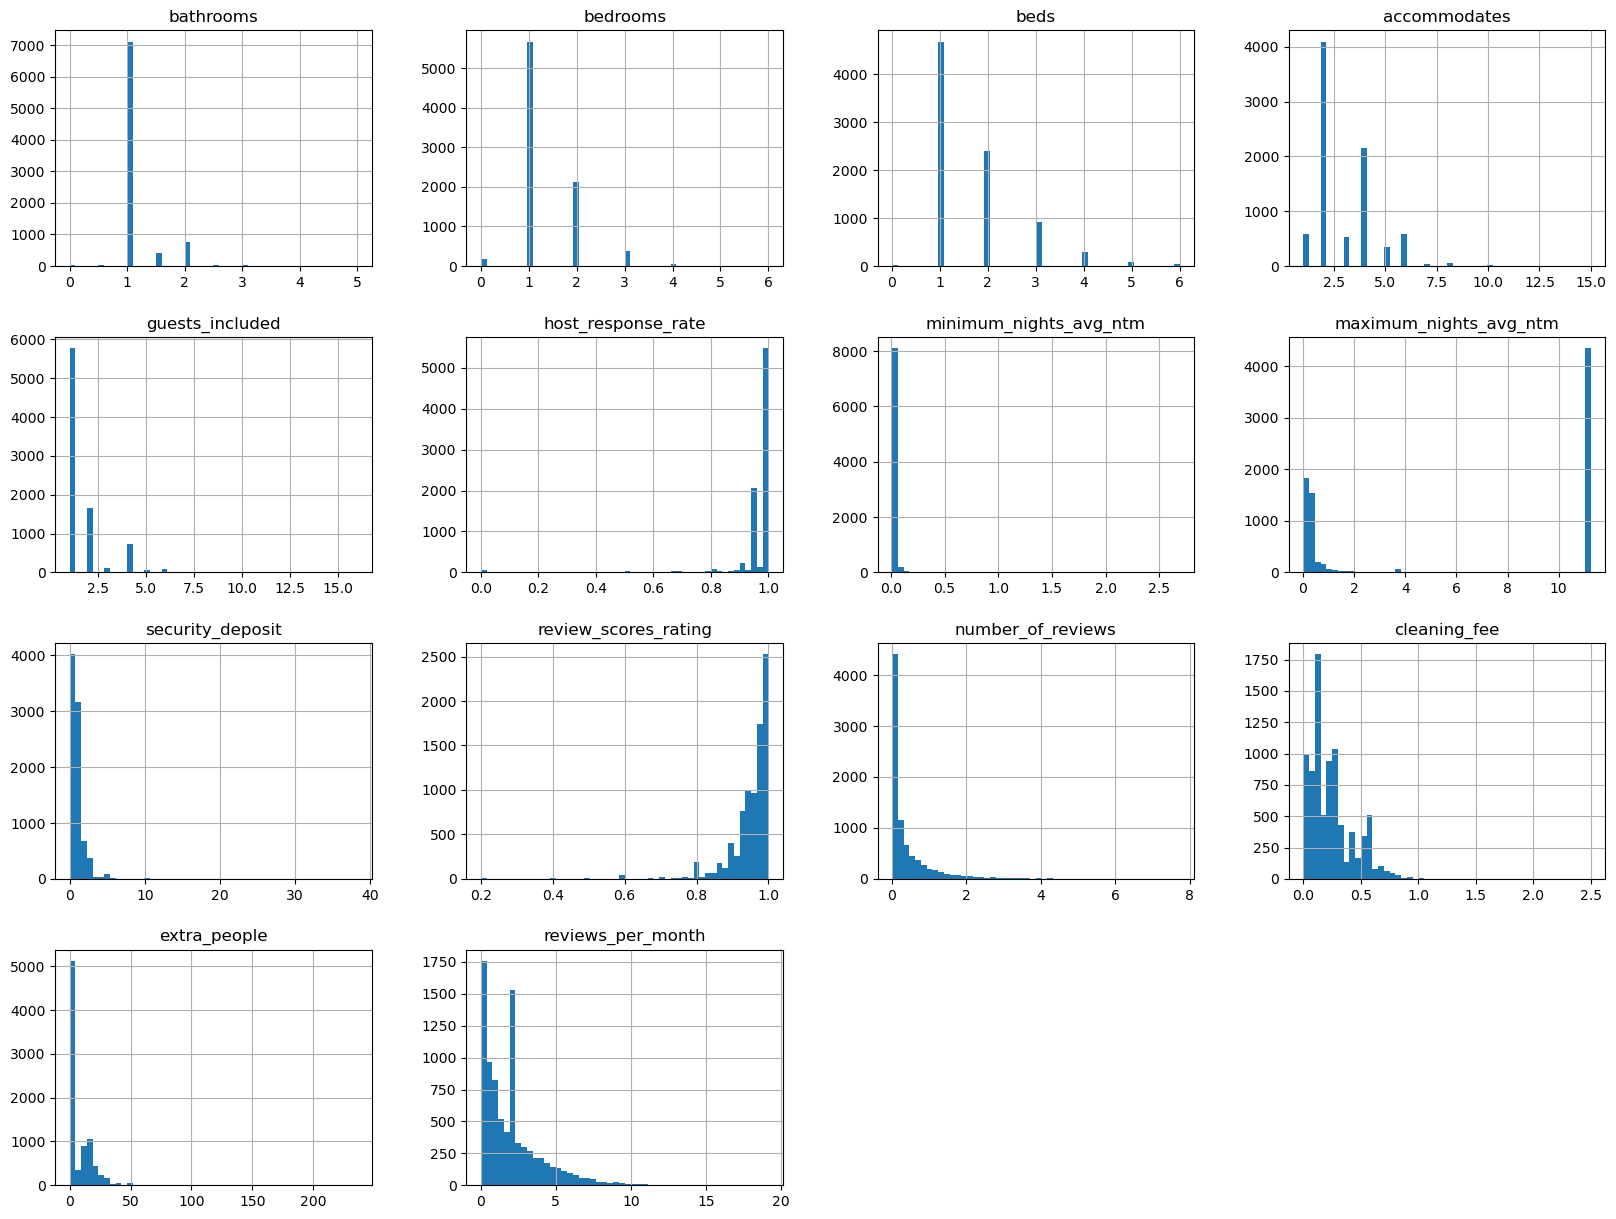

In [62]:
num_train_cleaned.hist(bins=50, figsize=(20,15))
plt.show()


In [77]:
y_train_num=y_train.loc[num_train_cleaned.index]
y_test_num=y_test.loc[num_test_cleaned.index]

<a id="setup"></a>
# <p style="background-color: #5900ffff; font-family:calibri; color:white; font-size:80%; font-family:Verdana; text-align;center; border-radius:30px 35px;  padding:20px"> Important features </p>
Combine training and test feature sets and targets for a unified Lasso regression analysis. Fit a Lasso model to identify important features by shrinking less relevant coefficients toward zero. Visualize the feature importance using a bar plot of Lasso coefficients.

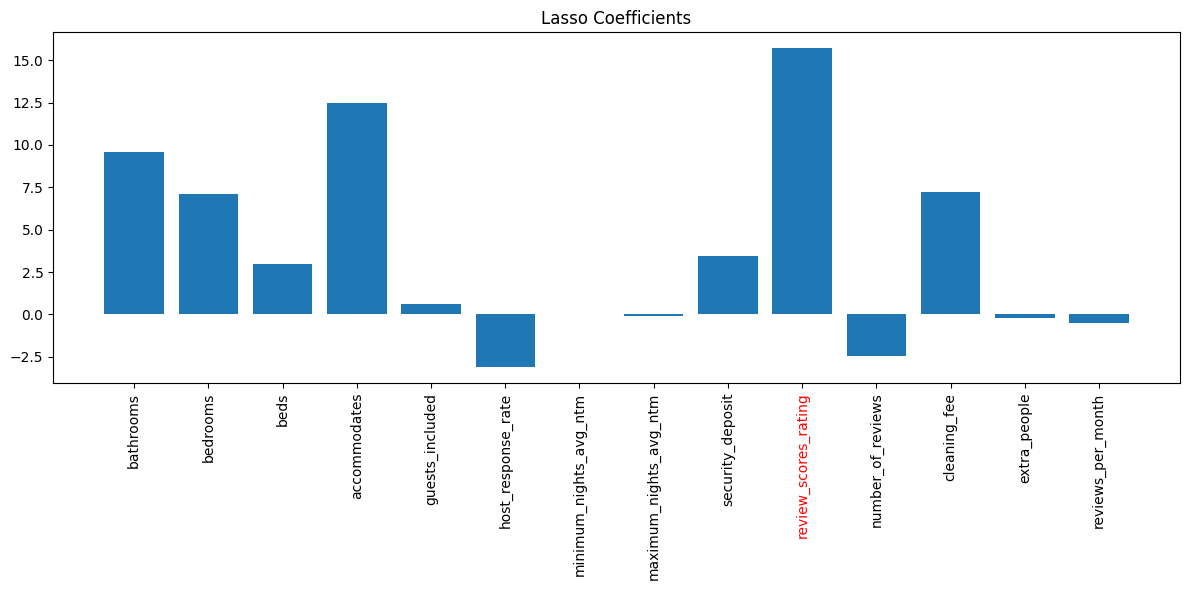

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Combine train and test sets
total_x = pd.concat([num_train_cleaned, num_test_cleaned], axis=0)
total_y = pd.concat([y_train_num, y_test_num], axis=0)

# Fit Lasso model
names = total_x.columns
lasso = Lasso(alpha=0.1)
lasso_co = lasso.fit(total_x, total_y).coef_

# Identify the most important feature (with max absolute coefficient)
important_idx = np.argmax(np.abs(lasso_co))
important_feature = names[important_idx]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(names, lasso_co)

# Color the x-label of the most important feature in red
colors = ['red' if name == important_feature else 'black' for name in names]
plt.xticks(ticks=np.arange(len(names)), labels=names, rotation=90, color='black')  # default color
for label, color in zip(plt.gca().get_xticklabels(), colors):
    label.set_color(color)

plt.title("Lasso Coefficients")
plt.tight_layout()
plt.show()

Feature Insights from the Plot:
1. accommodates (highlighted in red):
Has the strongest positive effect on the target (likely price).
Makes sense: more guests → higher price.

2. number_of_reviews:
Strong negative coefficient.
Possibly high-review listings are older or in saturated markets.

3. bathrooms, bedrooms, beds:
All have positive impact — more amenities → higher price.

4. review_scores_rating:
Positively correlated with the target — better rating, higher price.

5.host_response_rate, extra_people, min/max nights:
Coefficients are close to zero — Lasso considers them not useful for prediction.

#  Feature Engineering:
Based on the Lasso coefficient plot, the features accommodates, beds, and bedrooms showed significant positive influence on the target variable (likely price). These derived features capture interactions between them, which may carry additional predictive power beyond their individual contributions.
guests_per_bed: Measures how many guests are accommodated per bedroom. This helps quantify the intensity of room usage, which may relate to pricing or comfort level.

beds_per_bedroom: Calculates the average number of beds per bedroom, giving insight into the density or luxury of sleeping arrangements.

review_score_per_review: Combines quality and quantity. Helps reduce bias from listings with very few reviews but perfect scores.
+1 avoids division by zero.

In [79]:
num_train_cleaned['guests_per_bed']=num_train_cleaned.accommodates/(num_train_cleaned.bedrooms+1)
# num_train_cleaned['beds_per_bedroom']=num_train_cleaned.beds/(num_train_cleaned.bedrooms+1)
# num_train_cleaned['beds_per_accommodates'] = num_train_cleaned.beds / (num_train_cleaned.accommodates )
# num_train_cleaned['review_score_per_review'] = num_train_cleaned.review_scores_rating / (num_train_cleaned.number_of_reviews + 1)
# num_train_cleaned['bathrooms_per_accommodates'] = num_train_cleaned.bathrooms / (num_train_cleaned.accommodates + 1)

In [80]:
corr_matrix = num_train_cleaned.join(y_train,on='id',how='inner').corr()
corr_matrix["price"].sort_values(ascending=False)

price                     1.000000
accommodates              0.630564
bedrooms                  0.580801
beds                      0.564032
guests_per_bed            0.408488
cleaning_fee              0.382383
bathrooms                 0.325075
guests_included           0.298891
security_deposit          0.203063
extra_people              0.030244
minimum_nights_avg_ntm    0.022801
maximum_nights_avg_ntm    0.015382
review_scores_rating      0.001847
host_response_rate       -0.023340
reviews_per_month        -0.026093
number_of_reviews        -0.048823
Name: price, dtype: float64

In [81]:
num_test_cleaned['guests_per_bed']=num_test_cleaned.accommodates/(num_train_cleaned.bedrooms+1)
# num_test_cleaned['beds_per_bedroom']=num_test_cleaned.beds/(num_train_cleaned.bedrooms+1)
# num_test_cleaned['review_score_per_review'] = num_test_cleaned.review_scores_rating / (num_train_cleaned.number_of_reviews + 1)

# 5. Proprocessing - Categorical Features

This section focuses on categorical feature engineering. Following steps will be taken:

- Deal with missing data (dropping; Random Sample Imputation)
- Choose proper encoding for each feature


## 5.1 Handling Missing Data

In [82]:
cat_train2=cat_train.join(num_train_cleaned,on='id',how='inner')

In [83]:
cat_train=cat_train2[categorical_columns]
cat_train2.shape

(9975, 23)

In [84]:
cat_test=cat_test.join(num_test_cleaned,on='id',how='inner')

In [85]:
cat_test=cat_test[categorical_columns]
cat_test.shape

(2511, 8)

In [86]:
# Check for missing data
cat_train.isna().sum()

room_type                    0
property_type                0
neighbourhood_cleansed       0
host_response_time        2603
host_is_superhost           12
bed_type                     0
instant_bookable             0
cancellation_policy          0
dtype: int64

In [87]:
# Check for missing data
cat_test.isna().sum()

room_type                   0
property_type               0
neighbourhood_cleansed      0
host_response_time        637
host_is_superhost           5
bed_type                    0
instant_bookable            0
cancellation_policy         0
dtype: int64

### Missing data in `host_is_superhost` - Drop
There are very few missing values in these rows. I will simply remove them.

In [88]:
cat_train1 = cat_train.dropna(subset = ['host_is_superhost'])
print('{} rows were removed.'.format(cat_train.shape[0] - cat_train1.shape[0]))

12 rows were removed.


In [89]:
cat_test1 = cat_test.dropna(subset = ['host_is_superhost'])
print('{} rows were removed.'.format(cat_test.shape[0] - cat_test1.shape[0]))

5 rows were removed.


### Missing data in `host_response_time`

For categorical data, I will use Random Sample Imputation for missing values, which will keep the occurrence distribution of each value.

In [90]:
cat_train1.join(num_train_cleaned,on='id',how='inner').groupby('host_response_time')['host_response_rate'].mean()

host_response_time
a few days or more    0.124706
within a day          0.887774
within a few hours    0.969169
within an hour        0.990497
Name: host_response_rate, dtype: float64

In [91]:
cat_train1.join(num_train_cleaned,on='id',how='inner')[cat_train1.\
join(num_train_cleaned,on='id',how='inner').host_response_time.isna()]['host_response_rate'].describe()

count    2591.000000
mean        0.954913
std         0.011258
min         0.951218
25%         0.951218
50%         0.951218
75%         0.951218
max         0.989206
Name: host_response_rate, dtype: float64

In [92]:
def fill_host_response_time(df):
    choices = ['within an hour', 'within a few hours']
    number_na = df['host_response_time'].isna().sum()
    random_values = np.random.choice(choices, size=number_na, replace=True)
    df.loc[df['host_response_time'].isna(), 'host_response_time'] = random_values
    return df

In [93]:
cat_train1 = fill_host_response_time(cat_train1)
print(cat_train1['host_response_time'].value_counts())

host_response_time
within an hour        6734
within a few hours    2489
within a day           638
a few days or more     102
Name: count, dtype: int64


In [94]:
cat_test1 = fill_host_response_time(cat_test1)
print(cat_test1['host_response_time'].value_counts())

host_response_time
within an hour        1721
within a few hours     594
within a day           161
a few days or more      30
Name: count, dtype: int64


## 5.2 Categorical Feature Encoding

In [95]:
cat_train1.select_dtypes('object').describe()

,room_type,property_type,neighbourhood_cleansed,host_response_time,host_is_superhost,bed_type,instant_bookable,cancellation_policy
count,9963,9963,9963,9963,9963,9963,9963,9963
unique,3,27,111,4,2,5,2,5
top,Entire home/apt,Apartment,"Old Town, Princes Street and Leith Street",within an hour,f,Real Bed,f,strict_14_with_grace_period
freq,6053,8127,671,6734,6817,9860,4983,3982


**The 8 categorical features can be classified into 2 tyeps**  
Each type will be considered separately:
- 5 have more classes: `room_type`, `host_response_time`, `bed_type`, `cancellation_policy`, `property_type`
- 1 special categorical feature: `neighbourhood_cleansed`  


**Feature `neighbourhood_cleansed`**  
This feature is considered special because it contains information on the location of the listings. As locaiton is commonly considered as one of the most important features when it comes to properties, special care should be taken in handling this feature. It has 111 unique values, without only several being dominant, so simply collapsing classes will not work for this feature. Despite of its high cardinality, OneHot Encoding is still worth trying. I will handle this feature with both OneHot Encoding and Target Encoding. They will both be used in model training  in later stpes.  

The name of this feature will be changed to `neighbourhood` for simplicity.

In [96]:
cat_train1.neighbourhood_cleansed.unique().size

111

### 5.2.2 Encoding for other categorical features (excluding `neighbourhood`)
Feaures to be encoded:
- `room_type`
- `host_response_time`
- `bed_type` 
- `cancellation_policy`
- `property_type`

#### `room_type` - Label Encoding

In [97]:
cat_train1.loc[:,'room_type'] = cat_train1['room_type'].str.strip()
cat_test1.loc[:,'room_type'] = cat_test1['room_type'].str.strip()

In [98]:
def func_encode_categorical_feature(data, col):
    
    room_type_counts = data[col].value_counts()
    rare_types = room_type_counts[room_type_counts * 100 / data.shape[0] < 2].index

  
    data.loc[:, col] = data[col].replace(rare_types, 'Other')

    # 
    freq_encoding = data[col].value_counts(normalize=True).to_dict()
    data.loc[:, col] = data[col].map(freq_encoding)

    return data


In [99]:
room_type_map = {
    'Shared room': 0,
    'Private room': 1,
    'Entire home/apt': 2
}
cat_train1['room_type'] = cat_train1['room_type'].map(room_type_map)

In [100]:
room_type_map = {
    'Shared room': 0,
    'Private room': 1,
    'Entire home/apt': 2
}
cat_test1['room_type'] = cat_test1['room_type'].map(room_type_map)

In [101]:
cat_train1=func_encode_categorical_feature(cat_train1,'cancellation_policy')
cat_test1=func_encode_categorical_feature(cat_test1,'cancellation_policy')

In [102]:
cat_train1=func_encode_categorical_feature(cat_train1,'host_response_time')
cat_test1=func_encode_categorical_feature(cat_test1,'host_response_time')

In [103]:
cat_train1=func_encode_categorical_feature(cat_train1,'bed_type')
cat_test1=func_encode_categorical_feature(cat_test1,'bed_type')

In [104]:
cat_train1=func_encode_categorical_feature(cat_train1,'property_type')
cat_test1=func_encode_categorical_feature(cat_test1,'property_type')

In [105]:
cat_train1.loc[:,'host_is_superhost'] = cat_train1['host_is_superhost'].map({'f': 0, 't': 1})

In [106]:
cat_test1.loc[:,'host_is_superhost'] = cat_test1['host_is_superhost'].map({'f': 0, 't': 1})

In [107]:
cat_train1.loc[:,'instant_bookable'] = cat_train1['instant_bookable'].map({'f': 0, 't': 1})

In [108]:
cat_test1.loc[:,'instant_bookable'] = cat_test1['instant_bookable'].map({'f': 0, 't': 1})

### 5.2.3 Encoding for `neighbourhood_cleansed`

Special care will be taken when handling this feature because it contains information on location of the listings. Either of them can be used when training the models in later steps. `cat_features_1` and `cat_features_2` will contain `neighbourhood_cleansed` encoded with OneHot Encoding and Target Encoding, respectively.  



**2. Target Encoding**  

Target Encoding is prone to overfitting if some classes have very few samples, and it is arguably seen as "cheating" by some practitioners as it contains information directly extracted from the targets a model tries to predict. However, target encoding does not add dimensions to our data (as our target is numric), I will use it to prepare the data as an alternative to OneHot Encoding.

Additive Smoothing will be used to avoid overfitting caused by Target Encoding.

<!-- **3. Replace with a new feature `avg_price_per_bedroom_by_neighbourhood`**

The new feature reflects the average price per bedroom by neighbourhood. -->

In [109]:
# Rename column `neighbourhood_cleansed` as `neighbourhood`
cat_train1 = cat_train1.rename(columns = {'neighbourhood_cleansed': 'neighbourhood'})
cat_test1 = cat_test1.rename(columns = {'neighbourhood_cleansed': 'neighbourhood'})

### Option 1: Frequency Encoding

In [110]:
cat_train1p=func_encode_categorical_feature(cat_train1,'neighbourhood')
cat_test1p=func_encode_categorical_feature(cat_test1,'neighbourhood')

### Option 2: Target Encoding with additive smoothing

In [111]:
import pandas as pd

def smoothed_target_encoding(data, cat_col, target_col, m=10):
    """
    Apply smoothed target encoding to a categorical column.

    Parameters:
    - data: pandas DataFrame containing the data
    - cat_col: str, name of the categorical column to encode
    - target_col: str, name of the target column
    - m: int or float, smoothing parameter controlling the strength of regularization

    Returns:
    - encoded_col: pandas Series of encoded values for the categorical column
    """
    # Compute global mean of the target
    global_mean = data[target_col].mean()

    # Compute number of values and mean of target for each category
    agg = data.groupby(cat_col)[target_col].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the smoothed means
    smooth = (counts * means + m * global_mean) / (counts + m)

    # Map the smoothed means back to the original data
    encoded_col = data[cat_col].map(smooth)

    return encoded_col
    

### Encode each neighbourhood_cleansed using the mean latitude and longitude of listings within that neighborhood.

In [125]:
import plotly.express as px
import nbformat
# Step 1: Clean the price column

df=properties_df.drop('price',axis=1)
df=df.join(targets,on='id',how='inner')
df['price1'] = df['price'].astype(float)
# Step 2: Drop rows with missing coordinates or price
map_df = df.dropna(subset=['latitude', 'longitude', 'price1'])

# Optional: You can filter to reduce overcrowding (e.g. top 500 listings by price)
map_df = map_df.sort_values('price1', ascending=False).head(500)
# map_df.head()
# # Step 3: Plot
fig = px.scatter_mapbox(
    map_df,
    lat="latitude",
    lon="longitude",
    color="neighbourhood_cleansed",
    size="price1",
    hover_name="neighbourhood_cleansed",
    hover_data=["price"],
    zoom=10,
    height=600
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Listings by Neighbourhood and Price", margin={"r":0,"t":30,"l":0,"b":0})
fig.write_html("map.html")
import webbrowser
webbrowser.open("map.html") 

True


<a id="setup"></a>
<p style="background-color: #5900ffff; font-family:calibri; color:white; font-size:80%; font-family:Verdana; text-align; border-radius:30px 35px;  padding:20px">Coverting to Numeric Data Type</p>

In [126]:
# Step 1: Group by neighbourhood_cleansed and calculate mean lat/lon
geo_centroids = properties_df.groupby('neighbourhood_cleansed')[['latitude', 'longitude']].mean()

# Step 2: Rename columns for clarity
geo_centroids.columns = ['neighbourhood_lat_centroid', 'neighbourhood_lon_centroid']

# # Step 3: Merge back with the original DataFrame
# properties_df1 = properties_df.merge(geo_centroids, how='left',left_index=True)


In [127]:
# Map the latitude centroid from the groupby DataFrame
properties_df['neighbourhood_lat_centroid'] = properties_df['neighbourhood_cleansed'].map(
    geo_centroids['neighbourhood_lat_centroid']
)
properties_df['neighbourhood_lon_centroid'] = properties_df['neighbourhood_cleansed'].map(
    geo_centroids['neighbourhood_lon_centroid']
)



# Final cleaned data

## Model 1

In [128]:
num_train_cleaned3=properties_df[['neighbourhood_lat_centroid', 'neighbourhood_lon_centroid']].join(num_train_cleaned,on='id',how='inner')

In [129]:
num_test_cleaned3=properties_df[['neighbourhood_lat_centroid', 'neighbourhood_lon_centroid']].join(num_test_cleaned,on='id',how='inner')

In [130]:
cat_train_final3 = num_train_cleaned3.join(cat_train1, on='id', how='inner').sort_index()


In [131]:
cat_test_final3=num_test_cleaned3.join(cat_test1,on='id',how='inner').sort_index()

In [132]:
cat_train_final3.drop('neighbourhood',axis=1,inplace=True)
cat_test_final3.drop('neighbourhood',axis=1,inplace=True)

## Model2

In [133]:
cat_train_final2=num_train_cleaned.join(cat_train1p,on='id',how='inner').sort_index()
cat_test_final2=num_test_cleaned.join(cat_test1p,on='id',how='inner').sort_index()

### Final train and test target

In [134]:
y_train_final=y_train.loc[cat_train_final3.index].sort_index()
y_test_final=y_test.loc[cat_test_final3.index].sort_index()

In [135]:
# List of categorical columns to convert to float
cols_to_convert = [
    'property_type',
    'host_response_time',
    'host_is_superhost',
    'bed_type',
    'instant_bookable',
    'cancellation_policy'
]

# Convert selected columns to float
cat_train_final3[cols_to_convert] = cat_train_final3[cols_to_convert].astype(float)
cat_test_final3[cols_to_convert] = cat_test_final3[cols_to_convert].astype(float)
# cat_train_final2[cols_to_convert] = cat_train_final3[cols_to_convert].astype(float)
# cat_test_final2[cols_to_convert] = cat_test_final3[cols_to_convert].astype(float)

### Lets feature scaling

In [136]:
scalar=StandardScaler()
num_cat_train3_scaled=scalar.fit_transform(cat_train_final3)
num_cat_test3_scaled = scalar.transform(cat_test_final3)

In [137]:
scalar=StandardScaler()
num_cat_train2_scaled=scalar.fit_transform(cat_train_final2)
num_cat_test2_scaled = scalar.transform(cat_test_final2)


In [138]:
def fun_model(model, data, y):
    kf = KFold(n_splits=20, shuffle=True, random_state=42)
    model_reg = model
    model_reg.fit(data, y)
    
    y_predictions = model_reg.predict(data)
    mse = mean_squared_error(y, y_predictions)
    rmse = np.sqrt(mse)
    r2score = metrics.r2_score(y, y_predictions)

    scoring = ['neg_mean_squared_error', 'r2']
    cv_results = cross_validate(model_reg, data, y, scoring=scoring, cv=kf)

    rmse_scores = np.sqrt(-cv_results['test_neg_mean_squared_error'])
    r2_scores = cv_results['test_r2']

    return rmse, r2score, rmse_scores, r2_scores, model_reg


In [139]:
def display_scores(rmse_train,r2_score_train,rmse_scores_cross_val,r2_scores_cross_val):
     print("rmse_train:", rmse_train)
     print("r2_score_train:", r2_score_train)
     print("rmse_scores_cross_val:", rmse_scores_cross_val.mean())
     print("r2_scores_cross_val:",r2_scores_cross_val.mean())

### Let’s try another model now: the RandomForestRegressor

In [143]:
RFR_rmse_train, RFR_r2_score_train, RFR_rmse_scores_cross_val, RFR_r2_scores_cross_val, RFR_model=\
fun_model(RandomForestRegressor(n_estimators=500,n_jobs=-1),num_cat_train3_scaled,y_train_final)

display_scores(RFR_rmse_train, RFR_r2_score_train, RFR_rmse_scores_cross_val, RFR_r2_scores_cross_val)

rmse_train: 11.070870556629218
r2_score_train: 0.9507035090427289
rmse_scores_cross_val: 29.831718401867743
r2_scores_cross_val: 0.6405497338867161


Random Forests look very promising (r2_scores_cross_val: 0.64). However, note that
the score on the training set (11.52650) is still much lower than on the validation sets (30.7016), meaning
that the model is still overfitting the training set.

In [144]:
# RFR_results = {
#     'rmse_train': RFR_rmse_train,
#     'r2_train': RFR_r2_score_train,
#     'rmse_cross_val': RFR_rmse_scores_cross_val,
#     'r2_cross_val': RFR_r2_scores_cross_val,
#     'model': RFR_model  
# }
# #Save metrics (not model) to CSV 
# metrics_df = pd.DataFrame({
#     'Metric': ['RMSE_Train', 'R2_Train', 'Mean_RMSE_CV', 'Mean_R2_CV'],
#     'Value': [RFR_rmse_train, RFR_r2_score_train, 
#               np.mean(RFR_rmse_scores_cross_val), np.mean(RFR_r2_scores_cross_val)]
# })
# metrics_df.to_csv('RFR_metrics.csv', index=False)
# # Save the trained model 
# joblib.dump(RFR_model, 'RFR_model.pkl')
# loaded_model = joblib.load('RFR_model.pkl')
# # loaded_model = joblib.load('RFR_model.pkl')


In [ ]:
### Let’s try XGBoost model

In [145]:
xgb_rmse_train, xgb_r2_score_train, xgb_rmse_scores_cross_val, xgb_r2_scores_cross_val, xgb_model = \
    fun_model(xgb.XGBRegressor(objective='reg:squarederror',n_estimators =100),num_cat_train3_scaled,y_train_final)

display_scores(xgb_rmse_train, xgb_r2_score_train, xgb_rmse_scores_cross_val, xgb_r2_scores_cross_val)

rmse_train: 16.992121946712633
r2_score_train: 0.8838691115379333
rmse_scores_cross_val: 30.175851062872056
r2_scores_cross_val: 0.631899642944336


note that again
the score on the training set (17) is still much lower than on the validation sets (30), meaning
that the model is still overfitting the training set. To see the overfitting better we will use learning_curves.

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def plot_learning_curves(model, X, y, step=200, model_name=None):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train) + 1, step):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.figure(figsize=(8, 6))
    plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="Training RMSE")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="Validation RMSE")
    plt.xlabel("Training Set Size", fontsize=12)
    plt.ylabel("Root Mean Squared Error", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)

    title = model_name if model_name else type(model).__name__
    plt.title(f"Learning Curves - {title}", fontsize=14)
    plt.tight_layout()
    plt.show()


By plotting learning curves: There is a gap between the curves, sepcially for random frorest mode. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. To reduce overfitting is to regularize the 
modl. In the next part we firt will do Fine-Tune for our Model and then we we apply the  regularization of the model.(

In [ ]:
# RFR_model = joblib.load('RFR_model.pkl')

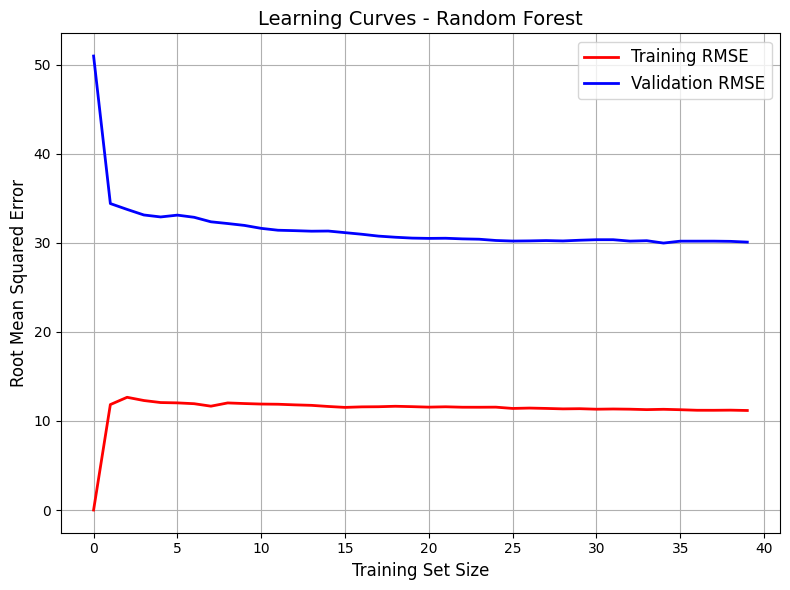

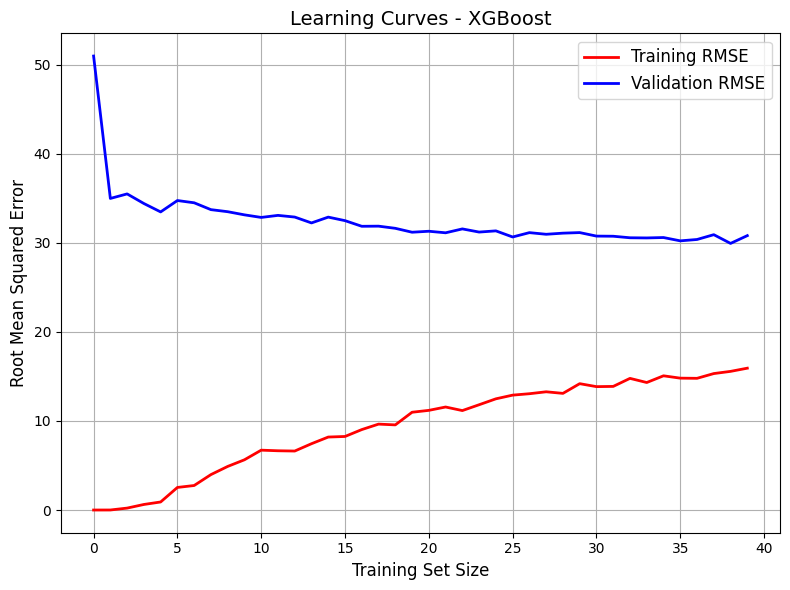

In [147]:
plot_learning_curves(RFR_model,num_cat_train3_scaled,y_train_final, step=200, model_name="Random Forest")
plot_learning_curves(xgb_model,num_cat_train3_scaled,y_train_final, step=200, model_name="XGBoost")

### Fine-Tune Model

you now have a shortlist of promising models (RFR,XGB). You now need to fine-tune them. We should get Scikit-Learn’s GridSearchCV to search for us. All you need to
do is tell it which hyperparameters you want it to experiment with, and what values to
try out, and it will evaluate all the possible combinations of hyperparameter values,
using cross-validation.

In [148]:
RFR_param_grid = [
{'n_estimators': [50,100,300], 'max_features': [3, 4,8],'max_depth': [None, 5, 10, 15]},
{'bootstrap': [False], 'n_estimators': [50,100,300], 'max_features': [3, 4,8],'max_depth': [None, 5, 10, 15]}
]

In [149]:
XGB_param_grid = {
    'n_estimators': [50,100, 300],
    'max_depth': [3, 5, 8],
    'learning_rate': [0.01, 0.05, .5]
}

In [150]:
def grid_search(model,data_scale,data_befor_scale,y,param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=3,
    scoring='neg_mean_squared_error',
    return_train_score=True, verbose=2 )
    grid_search.fit(data_scale,y)
    best_params=grid_search.best_params_
    best_model = grid_search.best_estimator_
    cvres = grid_search.cv_results_
    # for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    #     print(np.sqrt(-mean_score), params)
    feature_importances = grid_search.best_estimator_.feature_importances_
    attribs=data_befor_scale.columns
    important_features=sorted(zip(feature_importances, attribs), reverse=True)
    # print("feature_importances:",important_features)
    return best_params,feature_importances,attribs,best_model

In [151]:
RFR_model=RandomForestRegressor()
best_params_RF,feature_importances_RF,attribs_RF,best_model_RF=\
grid_search(RFR_model,num_cat_train3_scaled,cat_train_final3,y_train_final,RFR_param_grid)
# print(best_params_RF)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END ....max_depth=None, max_features=3, n_estimators=50; total time=   0.6s
[CV] END ....max_depth=None, max_features=3, n_estimators=50; total time=   0.5s
[CV] END ....max_depth=None, max_features=3, n_estimators=50; total time=   0.6s
[CV] END ...max_depth=None, max_features=3, n_estimators=100; total time=   1.2s
[CV] END ...max_depth=None, max_features=3, n_estimators=100; total time=   1.2s
[CV] END ...max_depth=None, max_features=3, n_estimators=100; total time=   1.2s
[CV] END ...max_depth=None, max_features=3, n_estimators=300; total time=   4.8s
[CV] END ...max_depth=None, max_features=3, n_estimators=300; total time=  10.6s
[CV] END ...max_depth=None, max_features=3, n_estimators=300; total time=   6.9s
[CV] END ....max_depth=None, max_features=4, n_estimators=50; total time=   1.5s
[CV] END ....max_depth=None, max_features=4, n_estimators=50; total time=   1.9s
[CV] END ....max_depth=None, max_features=4, n_

In [145]:
print(best_params_RF)

{'bootstrap': False, 'max_depth': None, 'max_features': 4, 'n_estimators': 300}


In [139]:
best_params_xgb,feature_importances_xgb,attribs_xgb,best_model_xgb=\
grid_search(xgb.XGBRegressor(objective='reg:squarederror'),num_cat_train3_scaled,cat_train_final3,y_train_final,XGB_param_grid)
# print(best_params_xgb)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=5, n_e

In [140]:
print(best_params_xgb)

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}


In [141]:
import pickle

# Save the Random Forest grid search results to a pickle file
with open("grid_search_results_rf.pkl", "wb") as file_rf:
    pickle.dump((best_params_RF, feature_importances_RF, attribs_RF,best_model_RF), file_rf)

# Save the XGBoost grid search results to a separate pickle file
with open("grid_search_results_xgb.pkl", "wb") as file_xgb:
    pickle.dump((best_params_xgb, feature_importances_xgb, attribs_xgb,best_model_xgb), file_xgb)

# Example of how to load the saved Random Forest results (commented out)
# with open("grid_search_results_rf.pkl", "rb") as file_rf:
#     best_params_RF, feature_importances_RF, attribs_RF = pickle.load(file_rf)


NameError: name 'best_params_RF' is not defined

In [ ]:
import pickle
# Example of how to load the saved Random Forest results (commented out)
with open("grid_search_results_rf.pkl", "rb") as file_rf:
    best_params_RF,feature_importances_RF,attribs_RF,best_model_RF = pickle.load(file_rf)
    

with open("grid_search_results_rf.pkl", "rb") as file_xgb:
    best_params_xgb, feature_importances_xgb, attribs_xgb,best_model_xgb = pickle.load(file_xgb)

In [ ]:
plot_learning_curves(best_model_RF,num_cat_train3_scaled,y_train_final, step=200, model_name="Random Forest")

Overfitting has improved slightly

### Visualizing feature importance for both model

In [142]:
import numpy as np
import matplotlib.pyplot as plt

feat_imp_df_RF = pd.DataFrame({
    'Feature': attribs_RF,
    'Importance': feature_importances_RF
})
feat_imp_df_xgb = pd.DataFrame({
    'Feature': attribs_xgb,
    'Importance': feature_importances_xgb
})
# Merge dataframes on feature name
merged_df = pd.merge(
    feat_imp_df_RF, 
    feat_imp_df_xgb, 
    on='Feature', 
    suffixes=('_RF', '_XGB')
)

# Sort by average importance
merged_df['Avg'] = (merged_df['Importance_RF'] + merged_df['Importance_XGB']) / 2
merged_df = merged_df.sort_values(by='Avg', ascending=True)  # Bottom-up for barh

# Plot side-by-side bars
features = merged_df['Feature']
y_pos = np.arange(len(features))

plt.figure(figsize=(10, 8))
bar_width = 0.4

plt.barh(y_pos - bar_width/2, merged_df['Importance_RF'], height=bar_width, label='Random Forest', color='skyblue')
plt.barh(y_pos + bar_width/2, merged_df['Importance_XGB'], height=bar_width, label='XGBoost', color='darkblue')

plt.yticks(y_pos, features)
plt.xlabel('Feature Importance')
plt.title('Feature Importances: Random Forest vs XGBoost')
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'attribs_RF' is not defined

# Evaluate Your System on the Test Set

After tweaking your models for a while, you eventually have a system that performs
sufficiently well. Now is the time to evaluate the final model on the test set

In [156]:
y_pred_test = best_model_RF.predict(num_cat_test3_scaled)

In [157]:
final_mse = mean_squared_error(y_test_final, y_pred_test)
final_rmse = np.sqrt(final_mse)
final_rmse

33.05118257647302

In [158]:
metrics.r2_score(y_test_final, y_pred_test)

0.569295525961855

In [143]:
y_pred_test_xgb = best_model_xgb.predict(num_cat_test3_scaled)

In [144]:
final_mse = mean_squared_error(y_test_final, y_pred_test_xgb)
final_rmse = np.sqrt(final_mse)
final_rmse

34.00132738439124

In [145]:
metrics.r2_score(y_test_final, y_pred_test_xgb)

0.5441760707930443